In [ ]:
import pandas as pd

file_path_1 = r"C:\Users\adria\Downloads\mnist_client1_train.parquet"
file_path_2 = r"C:\Users\adria\Downloads\mnist_client1_test.parquet"
df_train = pd.read_parquet(file_path_1)
df_test = pd.read_parquet(file_path_2)

In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random

# Seed everything for reproducibility
def set_seed(seed=42):
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    np.random.seed(seed)
    random.seed(seed)
    
set_seed(42)

def prepare_data(df_train, df_test):
    # Extract features (pixel values) and labels
    X_train = df_train.drop('label', axis=1).values
    y_train = df_train['label'].values
    X_test = df_test.drop('label', axis=1).values
    y_test = df_test['label'].values
    
    # Reshape to (num_samples, 28, 28, 1) and normalize
    X_train = np.expand_dims(X_train.reshape(-1, 28, 28) / 255.0, -1)
    X_test = np.expand_dims(X_test.reshape(-1, 28, 28) / 255.0, -1)
    
    return (X_train, y_train), (X_test, y_test)

def train_and_verify(model, x_train, y_train, epochs, x_test, y_test, save_name):
    print(model.summary())

    # Train the model
    history = model.fit(x_train, y_train, 
                       epochs=epochs, 
                       validation_data=(x_test, y_test))
    
    # Make predictions and print classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    # Create training plots
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Save the model
    model.save(save_name)
    print(f"Model saved as {save_name}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8669 - loss: 0.4609 - val_accuracy: 0.9650 - val_loss: 0.1179
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9736 - loss: 0.0878 - val_accuracy: 0.9712 - val_loss: 0.0921
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9839 - loss: 0.0545 - val_accuracy: 0.9737 - val_loss: 0.0826
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9889 - loss: 0.0371 - val_accuracy: 0.9761 - val_loss: 0.0806
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9929 - loss: 0.0264 - val_accuracy: 0.9795 - val_loss: 0.0779
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       790
           1       0.99      0.99      0.99       899
           2       0.98      0.97      0.97       794
           3       0.98      0.97      0.97       818
           4       0.98      0.98    

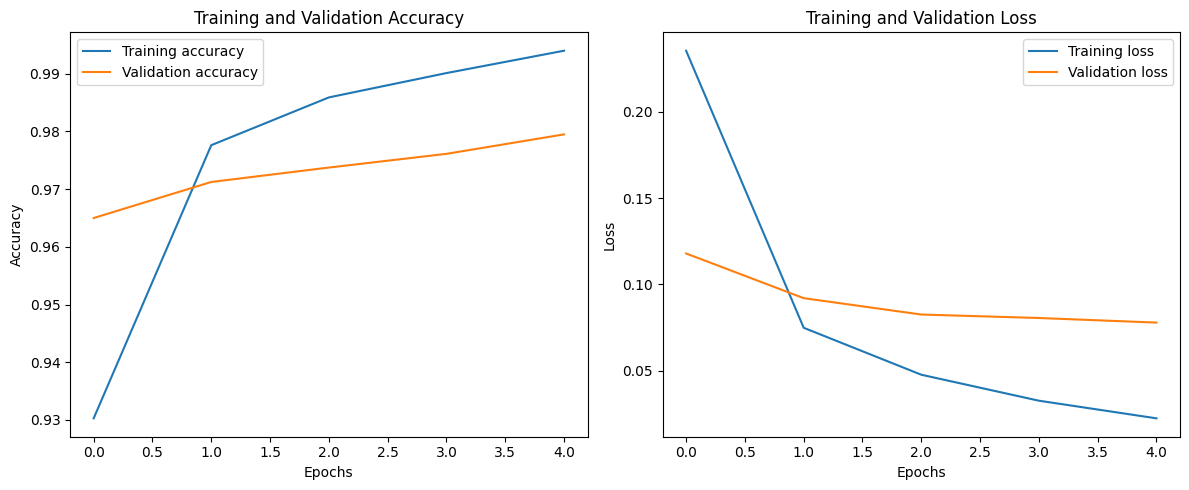

Model saved as my_model_victor.keras


In [ ]:
from TheModel import build

# Prepare your data
train_data, test_data = prepare_data(df_train, df_test)
x_train, y_train = train_data
x_test, y_test = test_data

# Build and train a single model
model = build.build_it() 
train_and_verify(model, x_train, y_train, 5, x_test, y_test, "my_model_avril.keras")


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,440 (3.97 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 694,294 (2.65 MB)